# <span style="color:darkred">  Esercitazione 4 </span>


### Esercizio 4.1


#### Richiesta

In your report, put some pictures which show that you have been able to equilibrate the thermodynamic phases at the beginning of your simulations.

________________________________
##### Svolgimento

Per tutte e tre le fasi (solida, liquida e gassosa) sono state eseguite due simulazioni differenti di uguali durata complessica (10000 steps) e con le stesse condizioni iniziali (diverse fase per fase). 
La prima è formata da 10 simulazioni concatenate, la seconda invece è data da una singola simulazione. In entrambe sono andato a confrontare l'andamento della Temperatura e dell'Energia Totale in funzione degli step della simulazione. 

In [1]:
import math
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

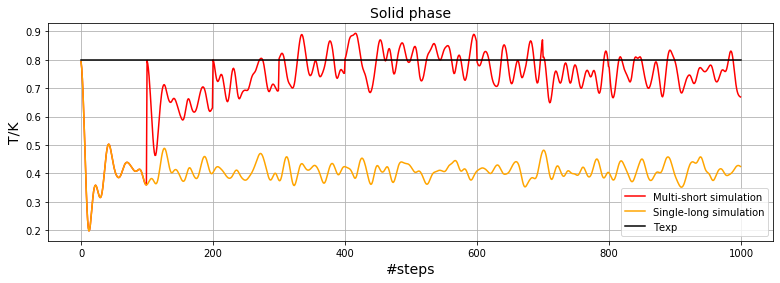

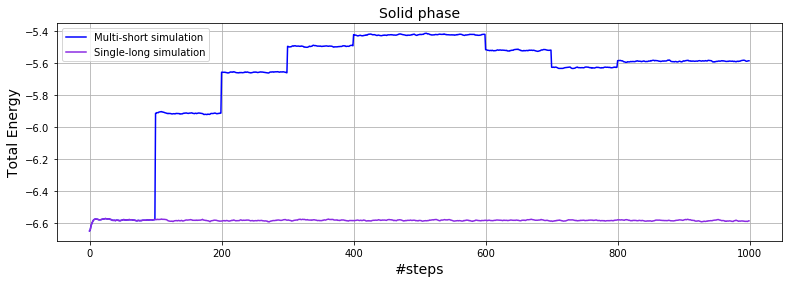

In [2]:
M = 1000
x = np.arange(M)
T = np.zeros(M)

T = 0*T + 0.8

s_temp = np.loadtxt("Es01/solid_temp.dat", usecols=(0), unpack='true')
s2_temp = np.loadtxt("Es01/solid2_temp.dat", usecols=(0), unpack='true')

s_etot = np.loadtxt("Es01/solid_etot.dat", usecols=(0), unpack='true')
s2_etot = np.loadtxt("Es01/solid2_etot.dat", usecols=(0), unpack='true')

plt.figure(1, figsize=(13,4))
plt.plot(x, s_temp, color='red', label='Multi-short simulation')
plt.plot(x, s2_temp, color='orange', label='Single-long simulation')
plt.plot(x, T, color='black', label='Texp')
plt.xlabel('#steps',fontsize= 14)
plt.ylabel('T/K',fontsize= 14)
plt.title('Solid phase', fontsize= 14)
plt.legend(loc='best')
plt.grid(True)


plt.figure(2, figsize=(13,4))
plt.plot(x, s_etot, color='blue', label= 'Multi-short simulation')
plt.plot(x, s2_etot, color='blueviolet', label= 'Single-long simulation')
plt.xlabel('#steps',fontsize= 14)
plt.ylabel('Total Energy',fontsize= 14)
plt.title('Solid phase', fontsize= 14)
plt.grid(True)
plt.legend(loc='best')


plt.show()

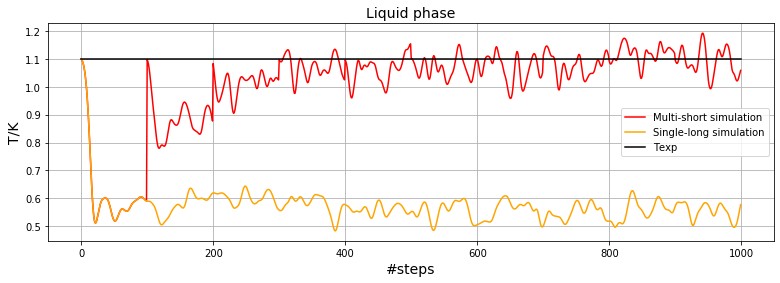

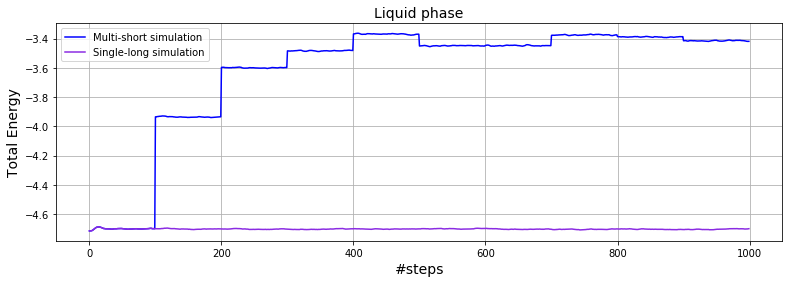

In [3]:
T = 0*T + 1.1

l_temp = np.loadtxt("Es01/liquid_temp.dat", usecols=(0), unpack='true')
l2_temp = np.loadtxt("Es01/liquid2_temp.dat", usecols=(0), unpack='true')

l_etot = np.loadtxt("Es01/liquid_etot.dat", usecols=(0), unpack='true')
l2_etot = np.loadtxt("Es01/liquid2_etot.dat", usecols=(0), unpack='true')

plt.figure(1, figsize=(13,4))
plt.plot(x, l_temp, color='red', label='Multi-short simulation')
plt.plot(x, l2_temp, color='orange', label='Single-long simulation')
plt.plot(x, T, color='black', label='Texp')
plt.xlabel('#steps',fontsize= 14)
plt.ylabel('T/K',fontsize= 14)
plt.title('Liquid phase', fontsize= 14)
plt.legend(loc='best')
plt.grid(True)


plt.figure(2, figsize=(13,4))
plt.plot(x, l_etot, color='blue', label= 'Multi-short simulation')
plt.plot(x, l2_etot, color='blueviolet', label= 'Single-long simulation')
plt.xlabel('#steps',fontsize= 14)
plt.ylabel('Total Energy',fontsize= 14)
plt.title('Liquid phase', fontsize= 14)
plt.grid(True)
plt.legend(loc='best')



plt.show()

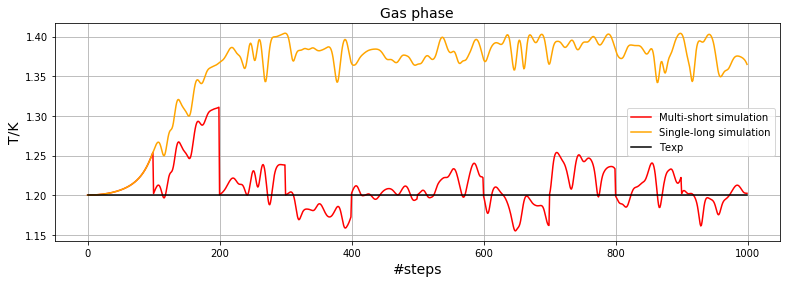

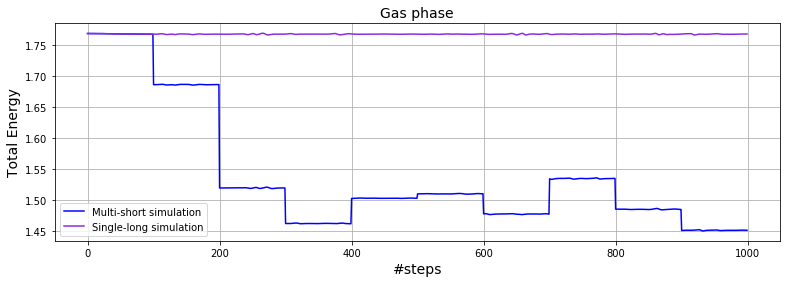

In [4]:
T = 0*T + 1.2

g_temp = np.loadtxt("Es01/gas_temp.dat", usecols=(0), unpack='true')
g2_temp = np.loadtxt("Es01/gas2_temp.dat", usecols=(0), unpack='true')

g_etot = np.loadtxt("Es01/gas_etot.dat", usecols=(0), unpack='true')
g2_etot = np.loadtxt("Es01/gas2_etot.dat", usecols=(0), unpack='true')

plt.figure(1, figsize=(13,4))
plt.plot(x, g_temp, color='red', label='Multi-short simulation')
plt.plot(x, g2_temp, color='orange', label='Single-long simulation')
plt.plot(x, T, color='black', label='Texp')
plt.xlabel('#steps',fontsize= 14)
plt.ylabel('T/K',fontsize= 14)
plt.title('Gas phase', fontsize= 14)
plt.legend(loc='best')
plt.grid(True)


plt.figure(2, figsize=(13,4))
plt.plot(x, g_etot, color='blue', label= 'Multi-short simulation')
plt.plot(x, g2_etot, color='blueviolet', label= 'Single-long simulation')
plt.xlabel('#steps',fontsize= 14)
plt.ylabel('Total Energy',fontsize= 14)
plt.title('Gas phase', fontsize= 14)
plt.legend(loc='best')
plt.grid(True)



plt.show()

Da tutti i tre grafici dell'andamento della temperatura si osserva che per equilibrare il sistema a una precisa $T = T_{exp}$  è necessario andare a concatenare simulazioni consecutive. La "single-long simulation" raggiunge si l'equilibrio, ma ad una temperatura diversa dalla temperatura richiesta. 

Per gli esercizi successivi è stato quindi deciso di equilibrare il sistema andando a concatenare 10 short simulation(1000 steps) prima di iniziare la misura, per lo stato liquido e solido. Per lo stato gassoso invece ho concatenato 15 short simulation per essere più sicuro, per via delle oscillazioni della temperatura ad ogni oscillazione.

Dai grafici sull'energia totale si osserva che durante le varie simulazioni rimane costante. Questo significa che durante tutta la durata della simulazione (sia nelle simulazioni corte, sia quella lunga) il sistema rimane nell'ensemble microcanonico. 

### Exercise 04.2 e 04.3

#### Richieste
#### 04.2
The Molecular Dynamics code we have provided prints out only instantaneous values for the total (internal) energy per particle, $E/N$, potential energy per particle, $U/N$, kinetic energy per particle, $K/N$, and temperature, $T$.
Take the MD code and include block averaging: 

Divide the <font face="Courier">nstep</font> of the simulation into <font face="Courier">nblocks</font>. By exploiting these blocks, code the calculation of the average values and the uncertainties for $E/N$, $U/N$, $K/N$ and $T$</span>, that will be written in new specific output files, for example: <font face="Courier">ave_epot.out, ave_ekin.out, ave_etot.out, ave_temp.out</font>

#### 04.3
By means of your upgraded MD code, equilibrate and perform MD simulations via a Lennard-Jones model of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

and show in pictures the obtained average values and uncertainties for the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$ and the temperature, $T$ in SI units!

______________________________
##### Svolgimento

I prossimi grafici mostrano i valori medi per $T$ e $E/N$, $U/N$, $K/N$ (in unità di Lennard-Jones) per la fase Solida, Liquida e Gassosa.
I valori sono presi su una simulazione di $nsteps = 50000$, con un analisi a 100 blocchi. Prima della simulazione i sistemi sono stati equilibrati con 10 simulazioni concatenate ($nsteps = 1000$) per le fasi solida e liquida, per la fase gassosa è stato necessario concatenare 15 simulazioni.

In [5]:
M = 100 #numero di blocchi
x = np.arange(M)

#parametri fisici
T0 = 120 #e/Kb
Kb = 0.00008167332262 # eV/K


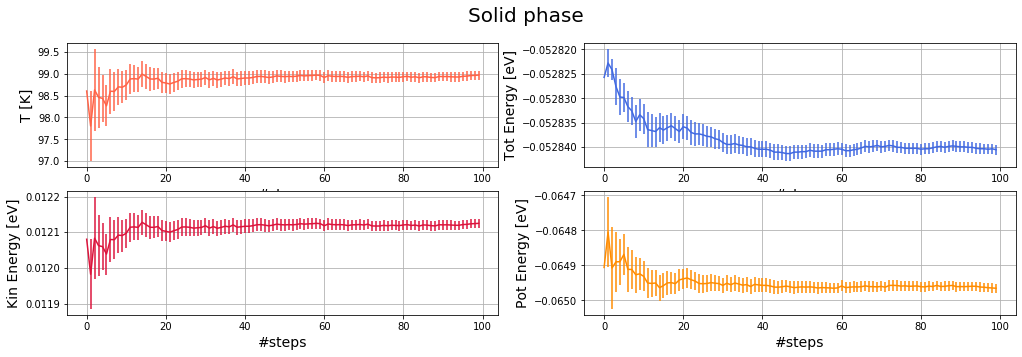

In [6]:
#Solid phase

s_temp, t_error = np.loadtxt("Es02/solid_temp.dat", usecols=(0,1), unpack='true') * T0
s_ekin, k_error = np.loadtxt("Es02/solid_ekin.dat", usecols=(0,1), unpack='true') * T0*Kb
s_epot, p_error = np.loadtxt("Es02/solid_epot.dat", usecols=(0,1), unpack='true') * T0*Kb
s_etot, tot_error = np.loadtxt("Es02/solid_etot.dat", usecols=(0,1), unpack='true') * T0*Kb

fig, canvas = plt.subplots(2,2 , figsize=(17,5))
fig.suptitle('Solid phase', fontsize= 20)


canvas[0,0].errorbar(x, s_temp, yerr=t_error, color='tomato', label ='T_Data')
canvas[0,0].set_xlabel('#steps',fontsize= 14)
canvas[0,0].set_ylabel('T [K]',fontsize= 14)
canvas[0,0].grid(True)

canvas[0,1].errorbar(x, s_etot ,yerr=tot_error, color='royalblue')
canvas[0,1].set_xlabel('#steps',fontsize= 14)
canvas[0,1].set_ylabel('Tot Energy [eV]',fontsize= 14)
canvas[0,1].grid(True)

canvas[1,0].errorbar(x, s_ekin, yerr=k_error, color='crimson')
canvas[1,0].set_xlabel('#steps',fontsize= 14)
canvas[1,0].set_ylabel('Kin Energy [eV]',fontsize= 14)
canvas[1,0].grid(True)

canvas[1,1].errorbar(x, s_epot, yerr=p_error, color='darkorange')
canvas[1,1].set_xlabel('#steps',fontsize= 14)
canvas[1,1].set_ylabel('Pot Energy [eV]',fontsize= 14)
canvas[1,1].grid(True)



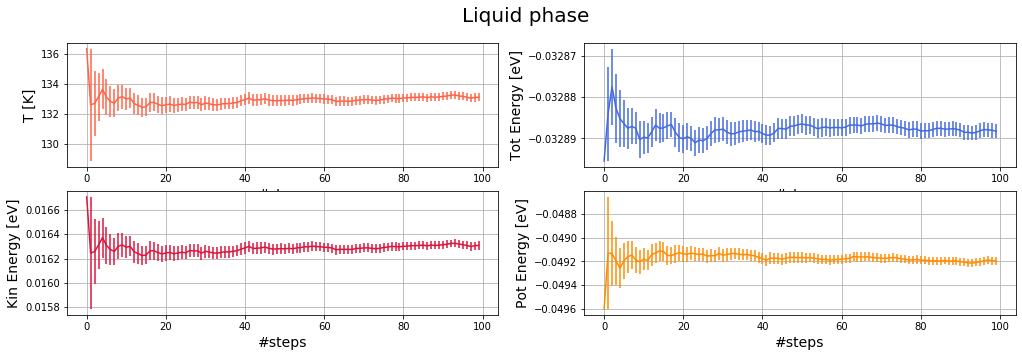

In [7]:
#Liquid phase

l_temp, t_error = np.loadtxt("Es02/liquid_temp.dat", usecols=(0,1), unpack='true') * T0
l_ekin, k_error = np.loadtxt("Es02/liquid_ekin.dat", usecols=(0,1), unpack='true') * T0*Kb
l_epot, p_error = np.loadtxt("Es02/liquid_epot.dat", usecols=(0,1), unpack='true') * T0*Kb
l_etot, tot_error = np.loadtxt("Es02/liquid_etot.dat", usecols=(0,1), unpack='true') * T0*Kb

fig, canvas = plt.subplots(2,2 , figsize=(17,5))
fig.suptitle('Liquid phase', fontsize= 20)


canvas[0,0].errorbar(x, l_temp, yerr=t_error, color='tomato', label ='T_Data')
canvas[0,0].set_xlabel('#steps',fontsize= 14)
canvas[0,0].set_ylabel('T [K]',fontsize= 14)
canvas[0,0].grid(True)

canvas[0,1].errorbar(x, l_etot ,yerr=tot_error, color='royalblue')
canvas[0,1].set_xlabel('#steps',fontsize= 14)
canvas[0,1].set_ylabel('Tot Energy [eV]',fontsize= 14)
canvas[0,1].grid(True)

canvas[1,0].errorbar(x, l_ekin, yerr=k_error, color='crimson')
canvas[1,0].set_xlabel('#steps',fontsize= 14)
canvas[1,0].set_ylabel('Kin Energy [eV]',fontsize= 14)
canvas[1,0].grid(True)

canvas[1,1].errorbar(x, l_epot, yerr=p_error, color='darkorange')
canvas[1,1].set_xlabel('#steps',fontsize= 14)
canvas[1,1].set_ylabel('Pot Energy [eV]',fontsize= 14)
canvas[1,1].grid(True)

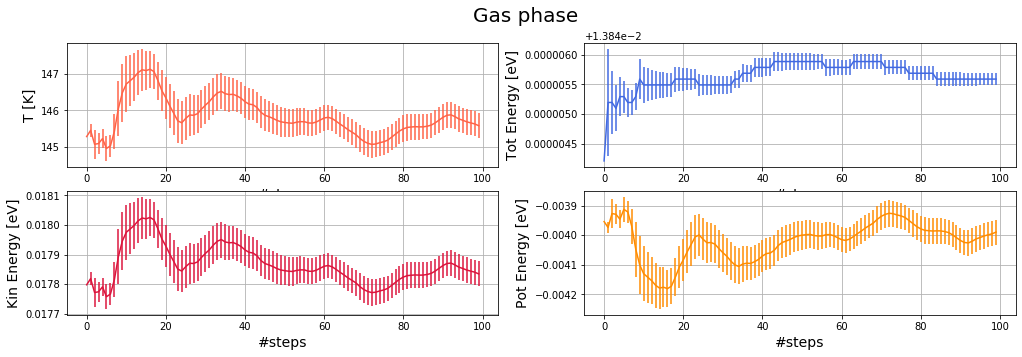

In [8]:
#Gas phase

g_temp, t_error = np.loadtxt("Es02/gas_temp.dat", usecols=(0,1), unpack='true') * T0
g_ekin, k_error = np.loadtxt("Es02/gas_ekin.dat", usecols=(0,1), unpack='true') * T0*Kb
g_epot, p_error = np.loadtxt("Es02/gas_epot.dat", usecols=(0,1), unpack='true') * T0*Kb
g_etot, tot_error = np.loadtxt("Es02/gas_etot.dat", usecols=(0,1), unpack='true') * T0*Kb

fig, canvas = plt.subplots(2,2 , figsize=(17,5))
fig.suptitle('Gas phase', fontsize= 20)


canvas[0,0].errorbar(x, g_temp, yerr=t_error, color='tomato', label ='T_Data')
canvas[0,0].set_xlabel('#steps',fontsize= 14)
canvas[0,0].set_ylabel('T [K]',fontsize= 14)
canvas[0,0].grid(True)

canvas[0,1].errorbar(x, g_etot ,yerr=tot_error, color='royalblue')
canvas[0,1].set_xlabel('#steps',fontsize= 14)
canvas[0,1].set_ylabel('Tot Energy [eV]',fontsize= 14)
canvas[0,1].grid(True)

canvas[1,0].errorbar(x, g_ekin, yerr=k_error, color='crimson')
canvas[1,0].set_xlabel('#steps',fontsize= 14)
canvas[1,0].set_ylabel('Kin Energy [eV]',fontsize= 14)
canvas[1,0].grid(True)

canvas[1,1].errorbar(x, g_epot, yerr=p_error, color='darkorange')
canvas[1,1].set_xlabel('#steps',fontsize= 14)
canvas[1,1].set_ylabel('Pot Energy [eV]',fontsize= 14)
canvas[1,1].grid(True)

Sui risultati trovati è interessante notare che in fase gassosa l'energia totale è maggiore di zero, in quanto non sono presenti stati legati nel sistema.